In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\Saisha Shetty\Desktop\files\insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
X1=data[ data['sex'] == 'female' ]
X2=data[ data['sex'] == 'male' ]

In [5]:
y1=X1.iloc[:,6:].values
y2=X2.iloc[:,6:].values

In [6]:
y2.size

676

In [7]:
agemale=X2.iloc[:,0:1].values
agefemale=X1.iloc[:,0:1].values

In [8]:
agemale.size

676

In [9]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(agemale,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

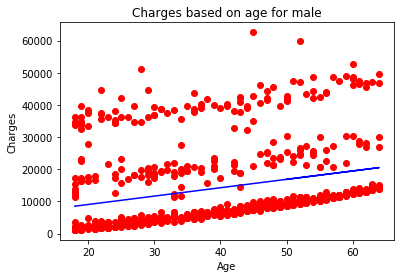

In [10]:
plt.scatter(agemale,y2,color='red')
plt.plot(agemale,regressor.predict(agemale),color='blue')
plt.title('Charges based on age for male')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
regressor1=LinearRegression()
regressor1.fit(agefemale,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

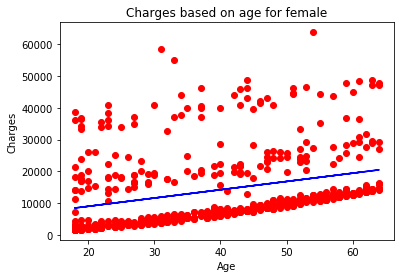

In [12]:
plt.scatter(agefemale,y1,color='red')
plt.plot(agefemale,regressor.predict(agefemale),color='blue')
plt.title('Charges based on age for female')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [13]:
regressor1.predict([[46]])  #female

array([[14239.37705865]])

In [14]:
regressor.predict([[53]])   #male

array([[17627.88483051]])

In [15]:
X1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [16]:
SM=X1.iloc[:,4:5].values

In [17]:
SM.size

662

In [18]:
SF=X2.iloc[:,4:5].values

In [19]:
SF.size

676

In [20]:
import seaborn as sns

In [21]:
sns.set()

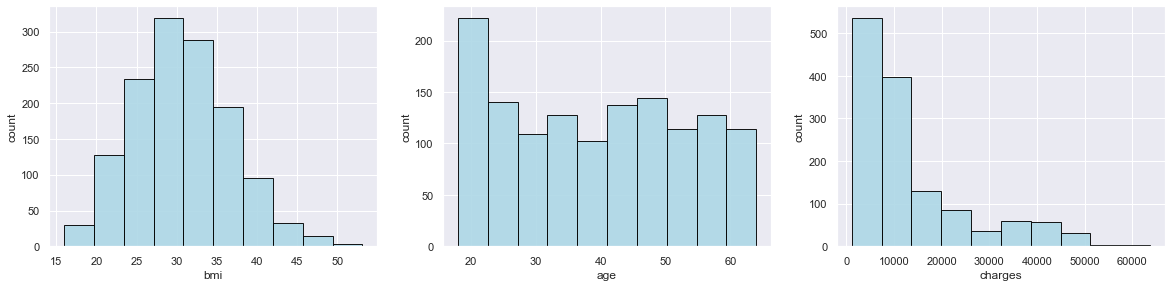

In [22]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data.bmi, color='lightblue', edgecolor = 'black', alpha = 0.9)
plt.xlabel('bmi')
plt.ylabel('count')

plt.subplot(3,3,2)
plt.hist(data.age, color='lightblue', edgecolor = 'black', alpha = 0.9)
plt.xlabel('age')
plt.ylabel('count')

plt.subplot(3,3,3)
plt.hist(data.charges, color='lightblue', edgecolor = 'black', alpha = 0.9)
plt.xlabel('charges')
plt.ylabel('count')

plt.show()

In [23]:
import scipy.stats as stats

In [24]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data.bmi),stats.skew(data.age),stats.skew(data.charges)]},
                        index=['bmi','age','charges'])

In [25]:
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


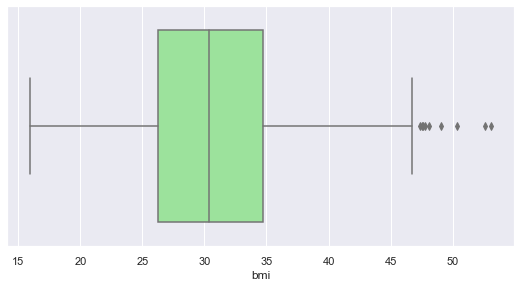

In [26]:
plt.figure(figsize= (20,15))
plt.subplot(3,2,1)
boxplot1=sns.boxplot(x=data.bmi,color='lightgreen')

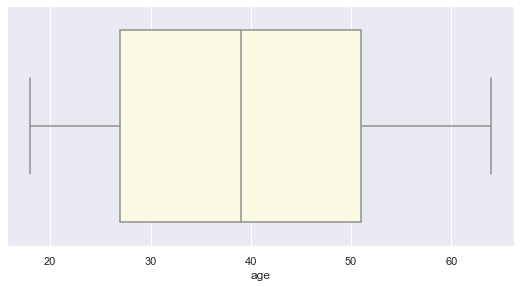

In [27]:
plt.figure(figsize= (20,15))
plt.subplot(3,2,1)
boxplot2=sns.boxplot(x=data.age,color='lightyellow')

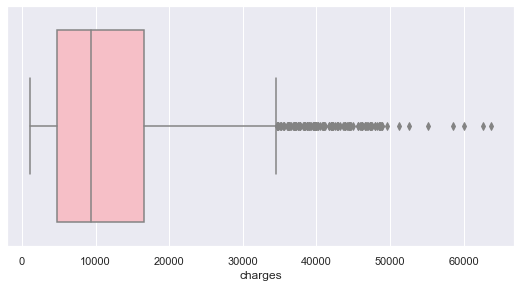

In [28]:
plt.figure(figsize= (20,15))
plt.subplot(3,2,1)
boxplot3=sns.boxplot(x=data.charges,color='lightpink')
#the dots or scattered dots show the extra values

In [29]:
x=data.smoker.value_counts().index
ys=[data['smoker'].value_counts()[i] for i in x]

Text(0, 0.5, 'count')

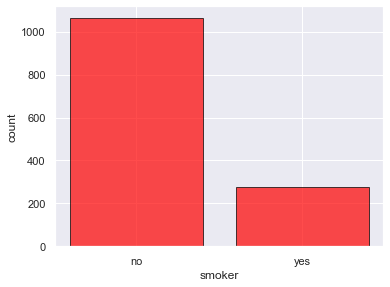

In [30]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.bar(x,ys, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)
plt.xlabel('smoker')
plt.ylabel('count')

Text(0, 0.5, 'count')

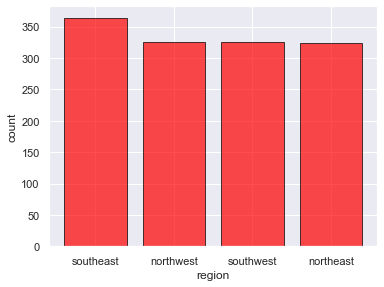

In [31]:
xr=data.region.value_counts().index
yr=[data['region'].value_counts()[j] for j in xr]
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.bar(xr,yr, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)
plt.xlabel('region')
plt.ylabel('count')

Text(0, 0.5, 'count')

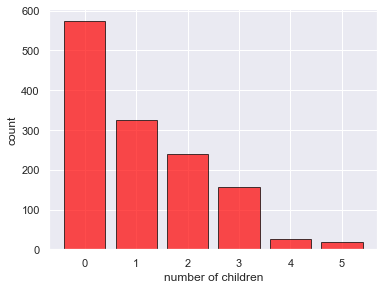

In [32]:
xc=data.children.value_counts().index
yc=[data['children'].value_counts()[k] for k in xc]
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.bar(xc,yc, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)
plt.xlabel('number of children')
plt.ylabel('count')

In [33]:
data.loc[data['smoker'] == 'yes','smoker'] = 1
data.loc[data['smoker'] == 'no','smoker'] = 0
data.loc[data['sex'] == 'male','sex'] = 0
data.loc[data['sex'] == 'female','sex'] = 1
data.loc[data['region'] == 'southwest','region'] = 1
data.loc[data['region'] == 'southeast','region'] = 2
data.loc[data['region'] == 'northwest','region'] = 3
data.loc[data['region'] == 'northeast','region'] = 4

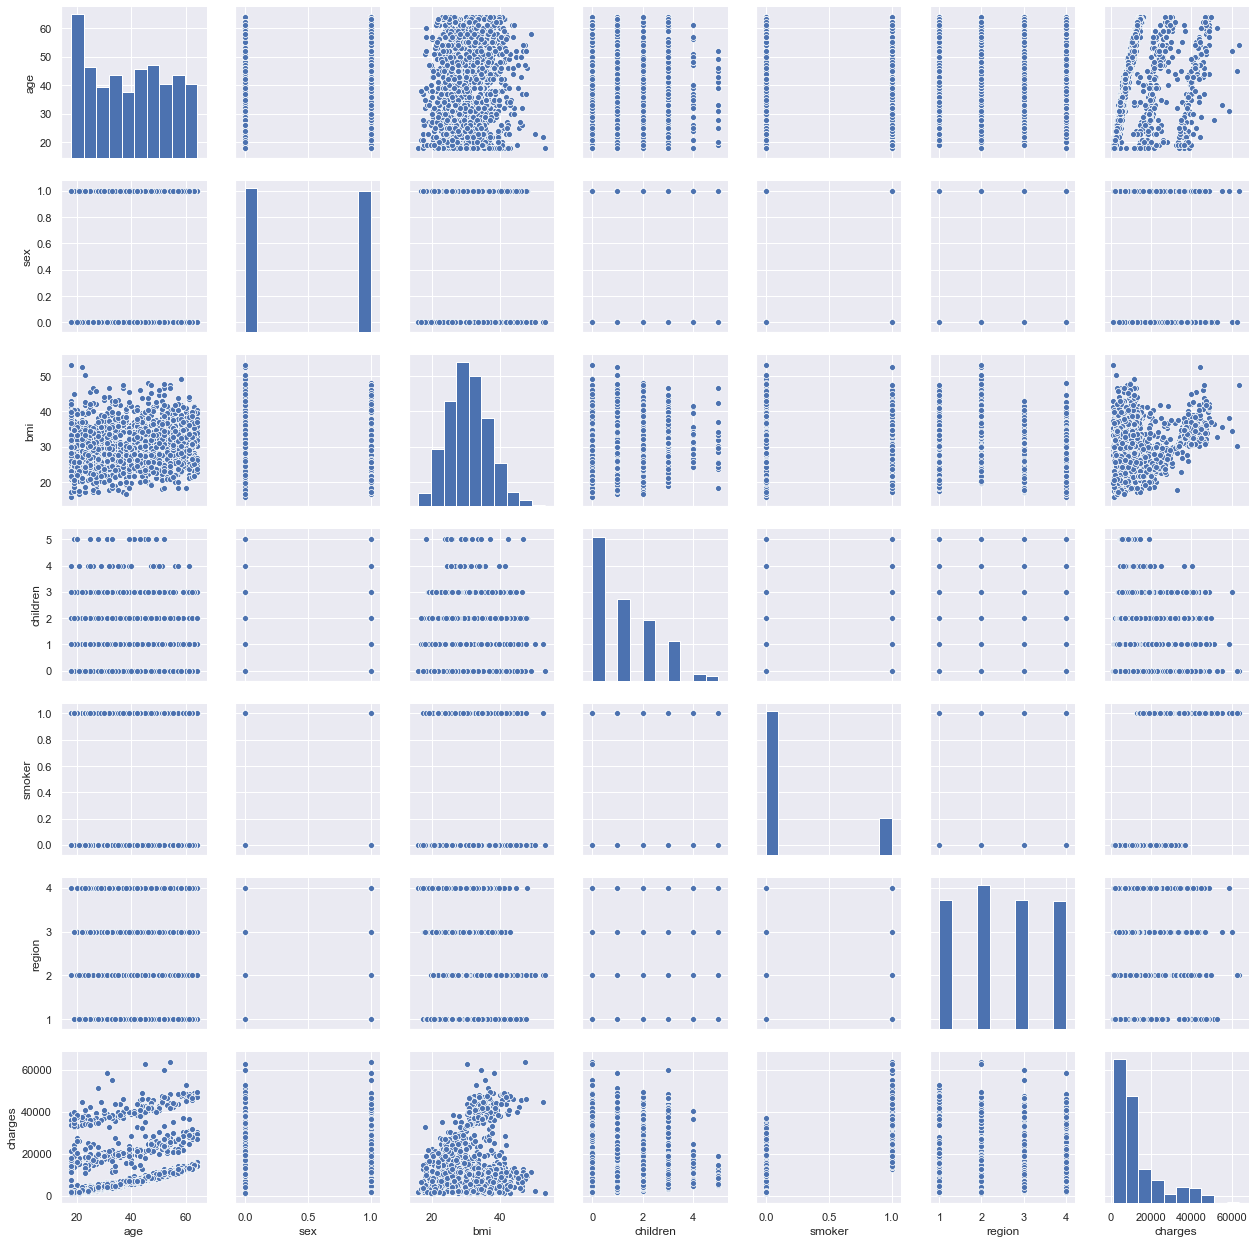

In [34]:
sns.pairplot(data)
plt.show()

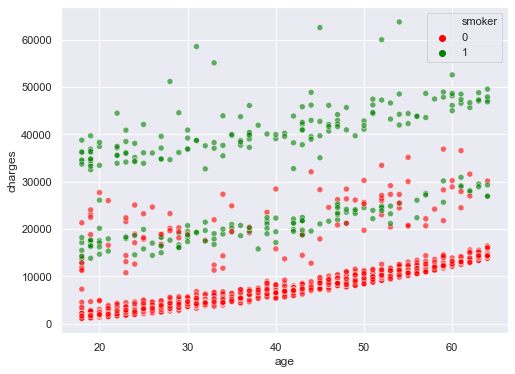

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

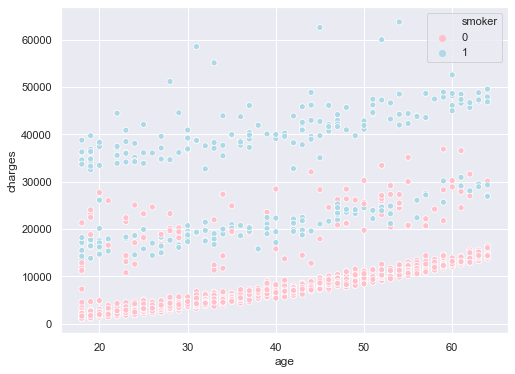

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['pink','lightblue'] )
plt.show()

In [37]:
Ho = "Charges of smoker and non-smoker are same"
Ha = "Charges of smoker and non-smoker are not the same"   

x = np.array(data[data.smoker == '1'].charges) 
y = np.array(data[data.smoker == '0'].charges) 
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are same as the p_value (nan) > 0.05


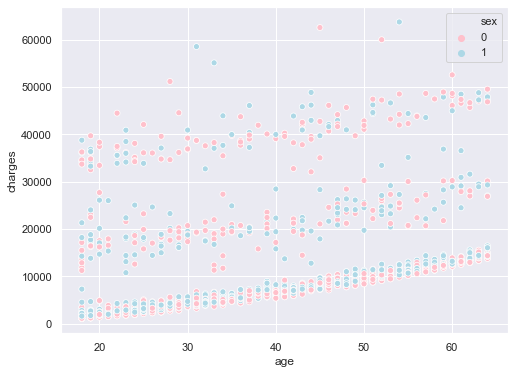

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.sex,palette= ['pink','lightblue'] )
plt.show()

In [39]:
Ho="Gender has no effect on BMI"
Ha="Gender does have an effect on BMI"
x = np.array(data[data.sex == '0'].bmi) 
y = np.array(data[data.sex == '1'].bmi) 
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Gender has no effect on BMI as the p_value (nan) > 0.05


In [40]:

Ho = "Region has no effect on smoking habits"  
Ha = "Region has an effect on smoking habits"  

crosstab = pd.crosstab(data['smoker'], data['region'])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Region has no effect on smoking habits as the p_value (0.062) > 0.05


In [43]:
import copy

In [44]:

Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   


female_df = copy.deepcopy(data[data['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (nan) > 0.05
